In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def get_df(file_path, check_head=True):
    """
    Reads a CSV file and returns a DataFrame.
    
    Parameters:
    file_path (str): Path to the CSV file.
    
    Returns:
    pd.DataFrame: DataFrame containing the data from the CSV file.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    # 만약 file_path가 .h5로 끝나는 경우는 다르게 읽기
    if file_path.endswith('.h5'):
        try:
            df = pd.read_hdf(file_path)
            # Reset index to avoid frequency issues
            if hasattr(df.index, 'freq'):
                df = df.reset_index(drop=True)
        except Exception as e:
            print(f"Error reading HDF5 file: {e}")
            # Try reading with different approach
            try:
                import h5py
                with h5py.File(file_path, 'r') as f:
                    # Get the first dataset
                    key = list(f.keys())[0]
                    data = f[key][:]
                    df = pd.DataFrame(data)
            except Exception as e2:
                print(f"Alternative HDF5 reading also failed: {e2}")
                return None
    else:
        df = pd.read_csv(file_path, header=None)

    if check_head and df is not None:
        print(df.head())  # Display the first few rows of the DataFrame for verification
        print('*'*50)
        #print(df.describe())  # Display summary statistics of the DataFrame

    return df

In [25]:
file_paths = [
    '/home/hwkang/SeqSNN/data/electricity/electricity.txt', # C=321
    '/home/hwkang/SeqSNN/data/solar-energy/solar_AL.txt', # C=137
    #'/home/hwkang/SeqSNN/data/exchange_rate/exchange_rate.txt', # C=8
    '/home/hwkang/SeqSNN/data/Weather_wide.txt', # C=21
    '/home/hwkang/SeqSNN/data/ETTh1_wide.txt',
    '/home/hwkang/SeqSNN/data/metr-la.h5'
]

In [26]:
dfs = [get_df(file_path) for file_path in file_paths]

    0     1      2      3      4       5     6       7      8      9    ...  \
0  14.0  69.0  234.0  415.0  215.0  1056.0  29.0   840.0  226.0  265.0  ...   
1  18.0  92.0  312.0  556.0  292.0  1363.0  29.0  1102.0  271.0  340.0  ...   
2  21.0  96.0  312.0  560.0  272.0  1240.0  29.0  1025.0  270.0  300.0  ...   
3  20.0  92.0  312.0  443.0  213.0   845.0  24.0   833.0  179.0  211.0  ...   
4  22.0  91.0  312.0  346.0  190.0   647.0  16.0   733.0  186.0  179.0  ...   

     311    312      313     314     315   316   317     318    319     320  
0  676.0  372.0  80100.0  4719.0  5002.0  48.0  38.0  1558.0  182.0  2162.0  
1  805.0  452.0  95200.0  4643.0  6617.0  65.0  47.0  2177.0  253.0  2835.0  
2  817.0  430.0  96600.0  4285.0  6571.0  64.0  43.0  2193.0  218.0  2764.0  
3  801.0  291.0  94500.0  4222.0  6365.0  65.0  39.0  1315.0  195.0  2735.0  
4  807.0  279.0  91300.0  4116.0  6298.0  75.0  40.0  1378.0  191.0  2721.0  

[5 rows x 321 columns]
*********************************

In [27]:
for df in dfs:
    print(df.shape)

(26304, 321)
(52560, 137)
(52696, 21)
(17420, 7)
(34272, 207)


In [28]:
def subplots_ts(df, title=None, figsize=(15, 6), nrows=3, ncols=3, save_to=None):
    """
    Plots time series data from a DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing time series data.
    title (str): Title of the plot.
    figsize (tuple): Size of the figure.
    nrows (int): Number of rows in the subplot grid.
    ncols (int): Number of columns in the subplot grid.
    """
    num_vars = df.shape[1]

    if nrows * ncols < num_vars:
        raise ValueError("The number of subplots is less than the number of variables in the DataFrame.")

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    fig.suptitle(title, fontsize=16)
    
    for i, col in enumerate(df.columns):
        ax = axes[i // ncols, i % ncols]
        # 선 굵기 얇게 조정
        df[col].plot(ax=ax, linewidth=0.5)
        ax.set_title(f'Channel {i}')  # Use index i instead of col for 0-based numbering
    
    # 공통 X축 라벨 제목으로 'Time' 설정
    for ax in axes.flat:
        ax.set_xlabel('Time')

    # 사용되지 않는 서브플롯 제거
    for j in range(num_vars, nrows * ncols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()

    if save_to is not None:
        plt.savefig(save_to, bbox_inches='tight', format='svg')

    plt.show()

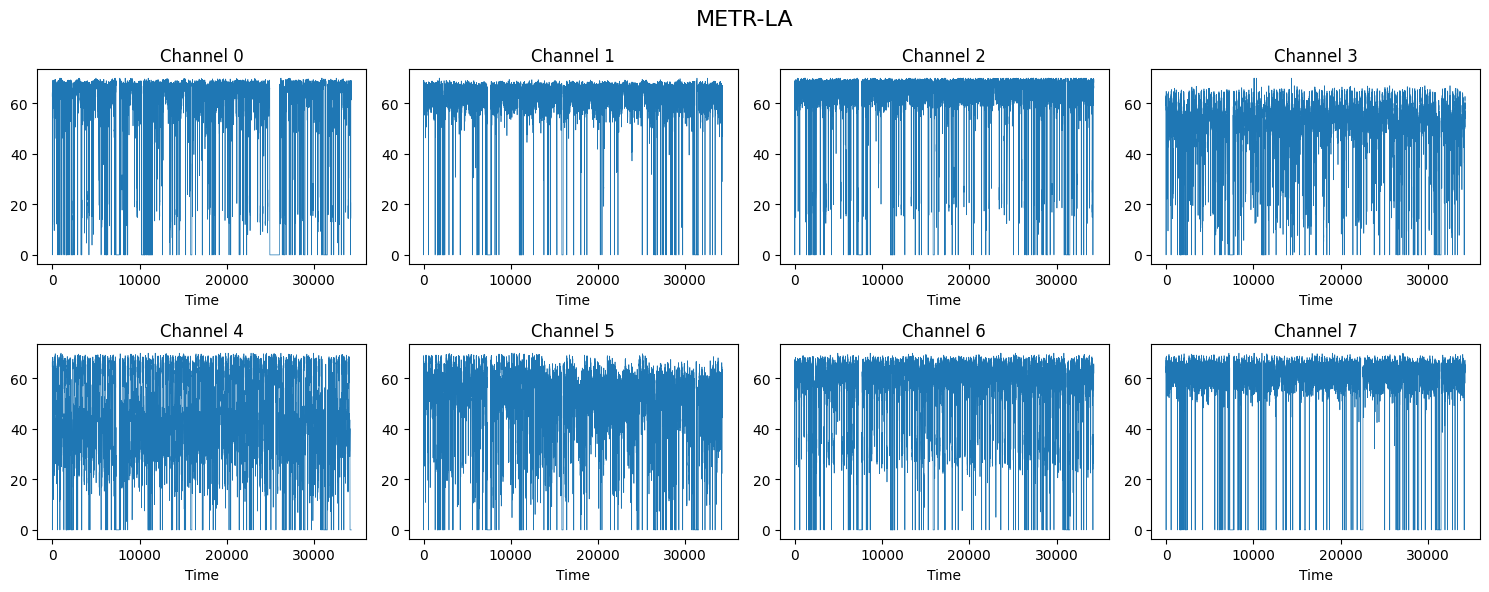

In [29]:
'''df_weather = dfs[2]
df_weather = df_weather.iloc[:, 0:8]
subplots_ts(df_weather, title='Weather', figsize=(15, 6), nrows=2, ncols=4, save_to='ts_weather.svg')

df_solar = dfs[1]
df_solar = df_solar.iloc[:, 0:8]
subplots_ts(df_solar, title='Solar', figsize=(15, 6), nrows=2, ncols=4, save_to='ts_solar.svg')

df_electricity = dfs[0]
df_electricity = df_electricity.iloc[:, 0:8]
subplots_ts(df_electricity, title='Electricity', figsize=(15, 6), nrows=2, ncols=4, save_to='ts_electricity.svg')

df_etth1 = dfs[3]
#df_etth1 = df_etth1.iloc[:, 0:8]
subplots_ts(df_etth1, title='ETTh1', figsize=(15, 6), nrows=2, ncols=4, save_to='ts_etth1.svg')'''

df_metr_la = dfs[4]
df_metr_la = df_metr_la.iloc[:, 0:8]
subplots_ts(df_metr_la, title='METR-LA', figsize=(15, 6), nrows=2, ncols=4, save_to='ts_metr-la.svg')